# Insurance Redlining - A Complete Example

This example ilustrates several of the ambiguities and difficulties encountered in statistical practice

* Insurance redlining is the practice of refusing to issue insurance to certain types of people or within some geographic area

#### Variables
* **race**: racial composition in percentage of minority
* **fire**: fires per 100 housing units
* **theft**: theft per 100 population
* **age**: percentage of housing units built before 1939
* **involact**: new FAIR plan policies and renewals per 100 housing units
* **income**: median family income in thousands of dollars
* **side**: North or South Side of Chicago

In [1]:
library(faraway)

In [6]:
data(eco)
head(eco)

,usborn,income,home,pop
,<dbl>,<dbl>,<dbl>,<dbl>
Alabama,0.98656,21442,75.9,4040587
Alaska,0.93914,25675,34.0,550043
Arizona,0.90918,23060,34.2,3665228
Arkansas,0.98688,20346,67.1,2350725
California,0.74541,27503,46.4,29760021
Colorado,0.94688,28657,43.3,3294394


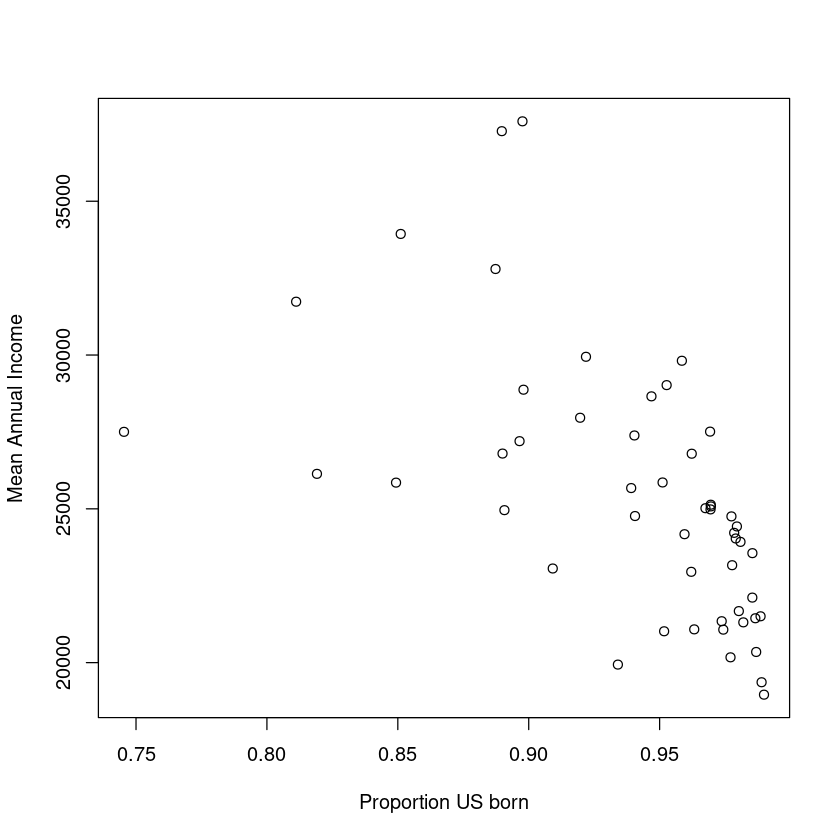

In [5]:
plot(income ~ usborn, data = eco, xlab = "Proportion US born", ylab="Mean Annual Income")

* Clear correlation between proportion of US born
* Let's fit a regression line and show the fitted line on an extended range

In [4]:
g = lm(income ~ usborn, eco)
summary(g)


Call:
lm(formula = income ~ usborn, data = eco)

Residuals:
    Min      1Q  Median      3Q     Max 
-6836.5 -2591.5   250.7  1332.1 10262.6 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    68642       8739   7.855 3.19e-10 ***
usborn        -46019       9279  -4.959 8.89e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3490 on 49 degrees of freedom
Multiple R-squared:  0.3342,	Adjusted R-squared:  0.3206 
F-statistic:  24.6 on 1 and 49 DF,  p-value: 8.891e-06


* Imigrants are naturally attracted to wealthier states

## Initial Data Analysis

In [7]:
data(chredlin)
head(chredlin)

,race,fire,theft,age,involact,income,side
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
60626,10.0,6.2,29,60.4,0.0,11.744,n
60640,22.2,9.5,44,76.5,0.1,9.323,n
60613,19.6,10.5,36,73.5,1.2,9.948,n
60657,17.3,7.7,37,66.9,0.5,10.656,n
60614,24.5,8.6,53,81.4,0.7,9.730,n
60610,54.0,34.1,68,52.6,0.3,8.231,n


In [8]:
summary(chredlin)

      race            fire           theft             age       
 Min.   : 1.00   Min.   : 2.00   Min.   :  3.00   Min.   : 2.00  
 1st Qu.: 3.75   1st Qu.: 5.65   1st Qu.: 22.00   1st Qu.:48.60  
 Median :24.50   Median :10.40   Median : 29.00   Median :65.00  
 Mean   :34.99   Mean   :12.28   Mean   : 32.36   Mean   :60.33  
 3rd Qu.:57.65   3rd Qu.:16.05   3rd Qu.: 38.00   3rd Qu.:77.30  
 Max.   :99.70   Max.   :39.70   Max.   :147.00   Max.   :90.10  
    involact          income       side  
 Min.   :0.0000   Min.   : 5.583   n:25  
 1st Qu.:0.0000   1st Qu.: 8.447   s:22  
 Median :0.4000   Median :10.694         
 Mean   :0.6149   Mean   :10.696         
 3rd Qu.:0.9000   3rd Qu.:11.989         
 Max.   :2.2000   Max.   :21.480         

* There wide range in the race variable. That is good and allows a better estimate of the effec more accurately. 
* skewness in the thelf and income variables
* Involact has large number of zeros

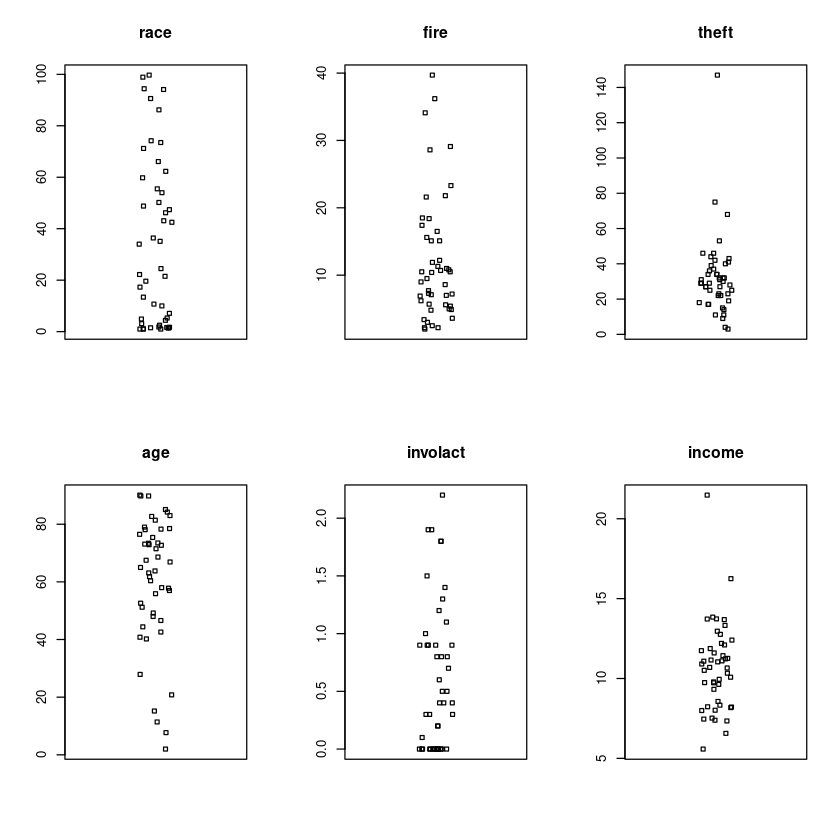

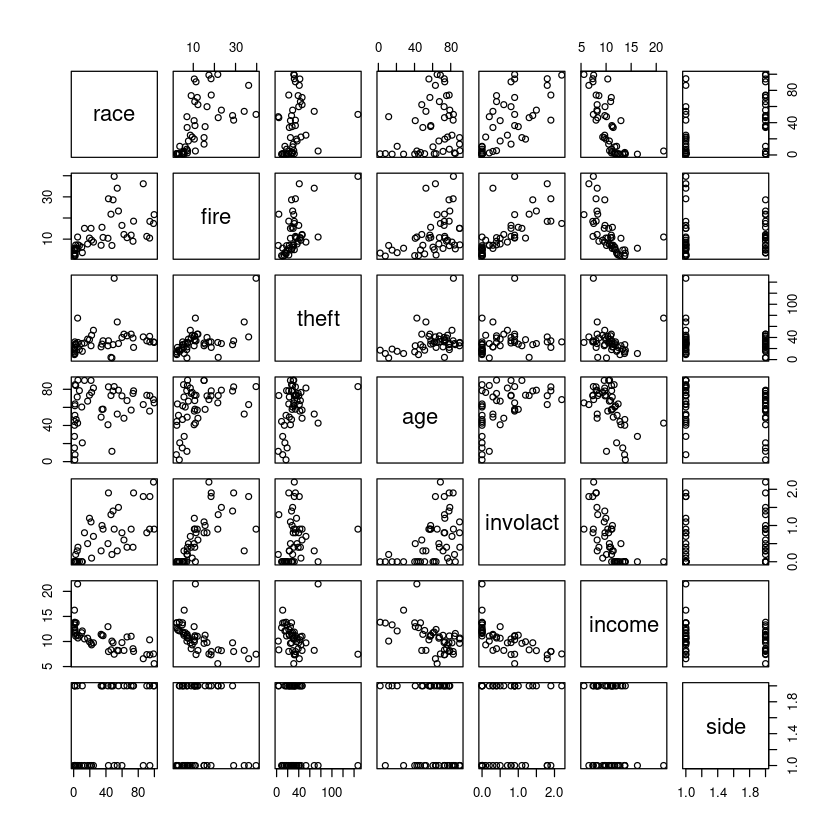

In [14]:
par(mfrow=c (2, 3))


for (i in 1:6) stripchart (chredlin [, i], main=names(chredlin)[i],vertical=TRUE, method="jitter")
par(mfrow=c (1, 1))
pairs (chredlin)

In [15]:
summary(lm(involact ~ race, chredlin))


Call:
lm(formula = involact ~ race, data = chredlin)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.7496 -0.2479 -0.1487  0.3129  1.1724 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.129218   0.096611   1.338    0.188    
race        0.013882   0.002031   6.836 1.78e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4488 on 45 degrees of freedom
Multiple R-squared:  0.5094,	Adjusted R-squared:  0.4985 
F-statistic: 46.73 on 1 and 45 DF,  p-value: 1.784e-08


* zip codes with hhigh percentage of minorities are taking the default FAIR plan at a higher rate than other zip codes

* Is that discrepancy due to greater risks in some zip codes?

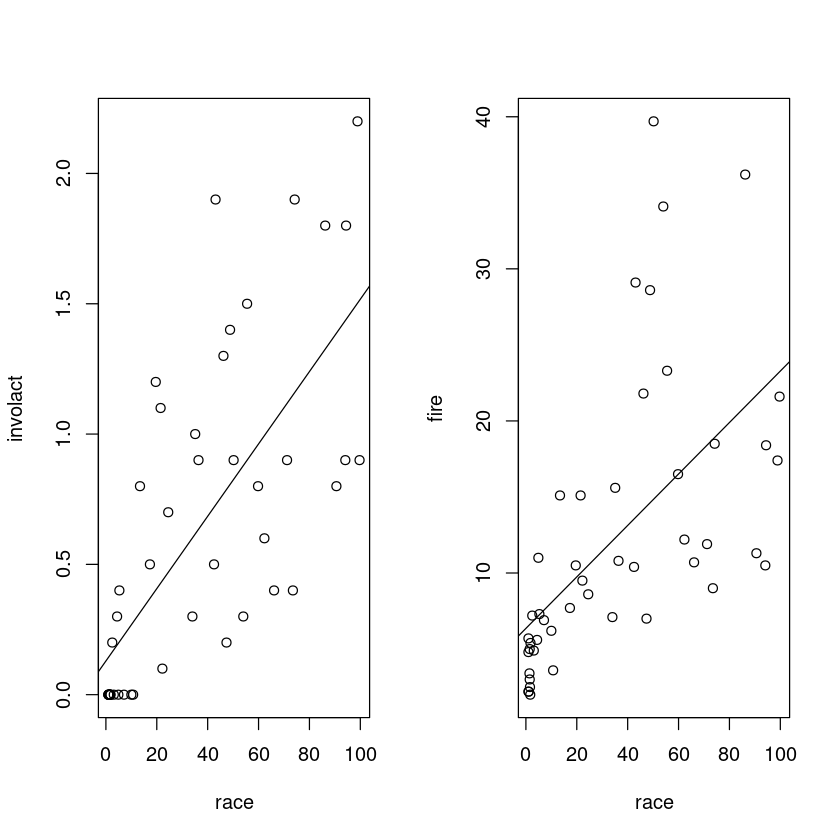

In [18]:
par(mfrow=c(1,2))
plot(involact ~ race, chredlin)
abline(lm(involact ~ race, chredlin))

plot(fire ~ race, chredlin)
abline(lm(fire ~ race, chredlin))

* We will  use log(income) because of the skewness but also because  income is better considered on a multiplicative rather than additive scale

## Initial Model and Diagnostics

In [19]:
g = lm(involact ~ race + fire + theft + age + log(income), chredlin)
summary(g)


Call:
lm(formula = involact ~ race + fire + theft + age + log(income), 
    data = chredlin)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.85393 -0.16922 -0.03088  0.17890  0.81228 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.185540   1.100255  -1.078 0.287550    
race         0.009502   0.002490   3.817 0.000449 ***
fire         0.039856   0.008766   4.547 4.76e-05 ***
theft       -0.010295   0.002818  -3.653 0.000728 ***
age          0.008336   0.002744   3.038 0.004134 ** 
log(income)  0.345762   0.400123   0.864 0.392540    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3345 on 41 degrees of freedom
Multiple R-squared:  0.7517,	Adjusted R-squared:  0.7214 
F-statistic: 24.83 on 5 and 41 DF,  p-value: 2.009e-11


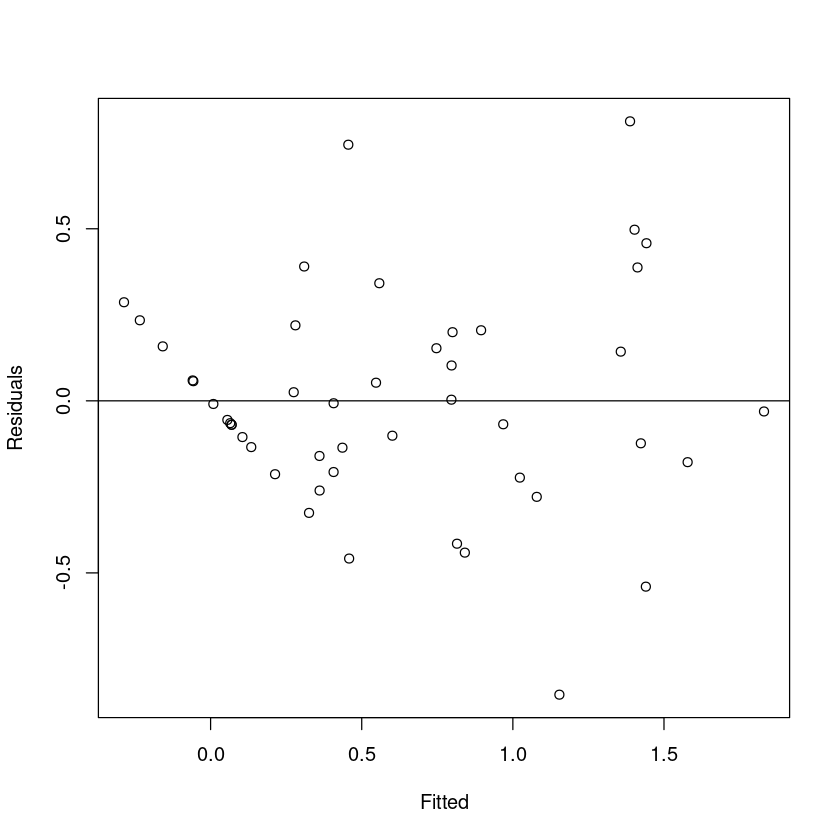

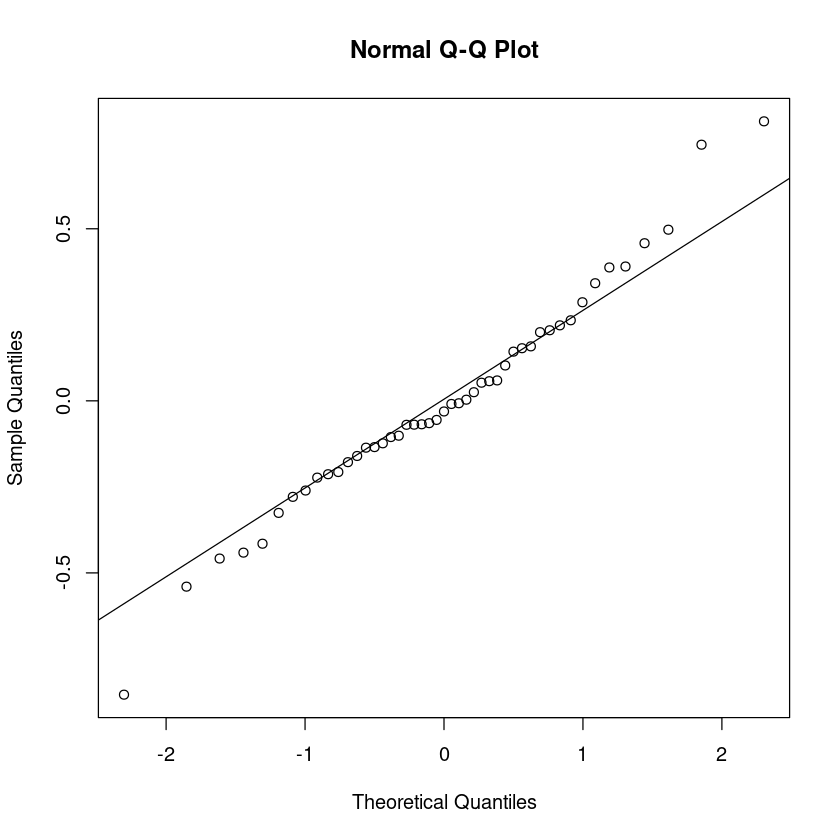

In [20]:
# model diagnostics
plot(fitted(g), residuals(g), xlab="Fitted", ylab="Residuals")
abline(h=0)
qqnorm(residuals(g))
qqline(residuals(g))

* The diagnoal streak in the residual-fitted plot is caused by the large number of zero response values in the data
$\hat \epsilon = - \hat y = -X^T \hat \beta$
* Except for that, everything else looks fine

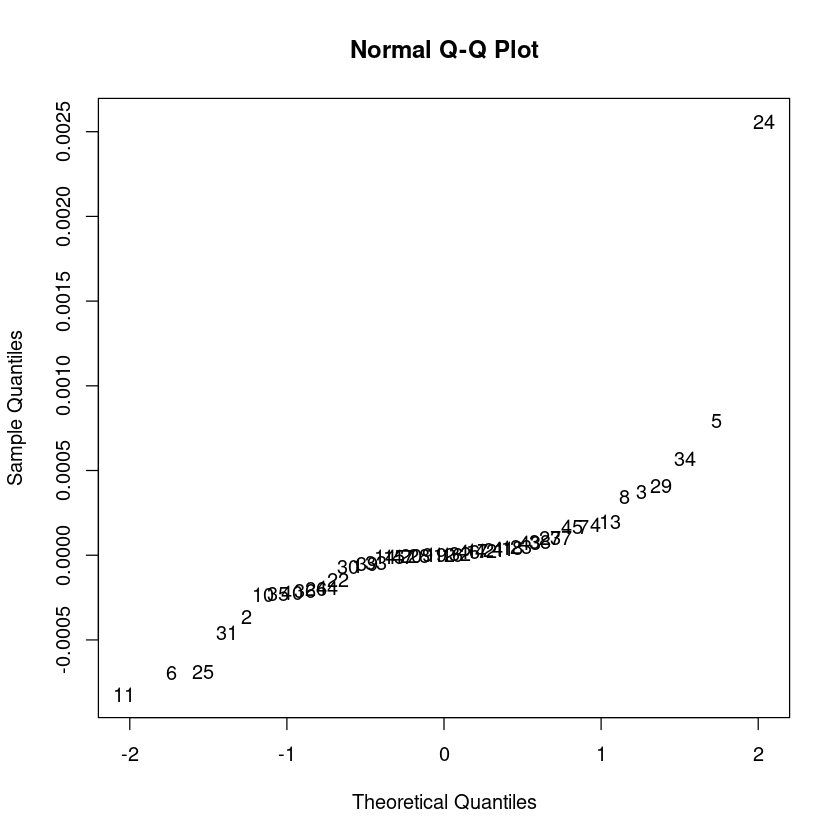

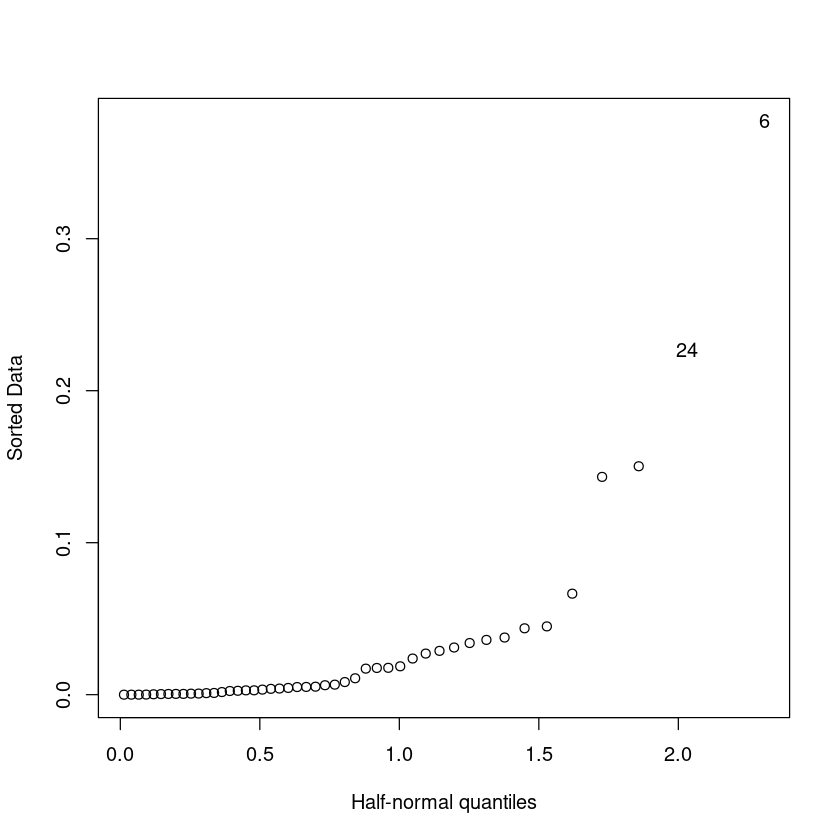

In [21]:
# influence
gi = influence(g)
qqnorml(gi$coef[,4])
halfnorm(cooks.distance(g))

* Cases 6 and 24 are highly influencial observations; let's test if they are really outliers

In [22]:
range(rstudent(g))

[1] -3.184960  2.792884

In [23]:
chredlin[c(6,24),]

,race,fire,theft,age,involact,income,side
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
60610,54.0,34.1,68,52.6,0.3,8.231,n
60607,50.2,39.7,147,83.0,0.9,7.459,n


* This are high theft and fire zip codes
* What happens if we exclude these points?

In [26]:
g = lm(involact ~ race + fire + theft + age + log(income), chredlin, subset= -c(6,24))
summary(g)


Call:
lm(formula = involact ~ race + fire + theft + age + log(income), 
    data = chredlin, subset = -c(6, 24))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.63445 -0.21208 -0.02757  0.15580  0.83307 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.576737   1.080046  -0.534   0.5964    
race         0.007053   0.002696   2.616   0.0126 *  
fire         0.049647   0.008570   5.793    1e-06 ***
theft       -0.006434   0.004349  -1.479   0.1471    
age          0.005171   0.002895   1.786   0.0818 .  
log(income)  0.115703   0.401113   0.288   0.7745    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3032 on 39 degrees of freedom
Multiple R-squared:  0.8041,	Adjusted R-squared:  0.779 
F-statistic: 32.01 on 5 and 39 DF,  p-value: 8.192e-13


## Transformation and Variable Selection

* Let's try some partial residual plots 

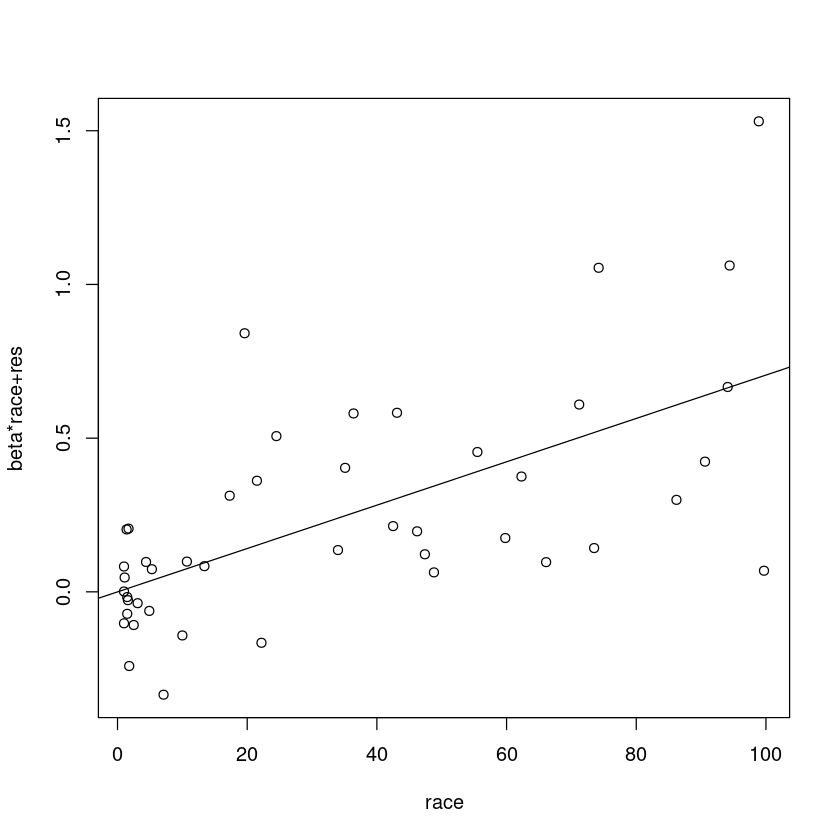

In [27]:
prplot(g,1)

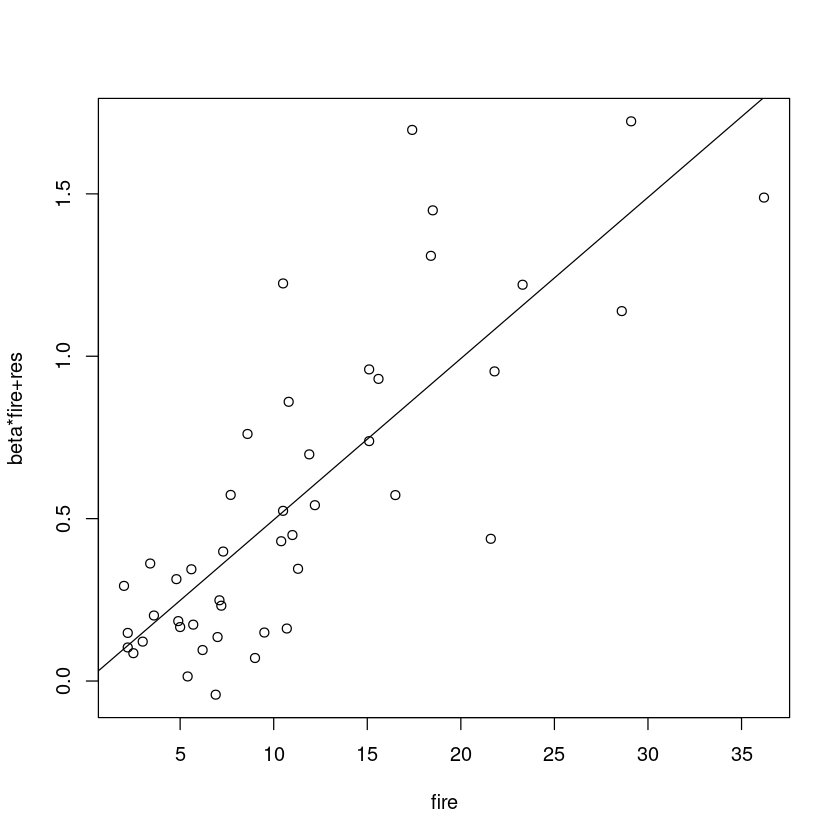

In [28]:
prplot(g, 2)

* The two significant variables do not seem to need any transformations.  
* The response variable should not be transformed in this case given high rate of zero, which would limit the possibilities and make interpretation difficult

Because we are not interested in picking the best model, but the better understand the response variable in relation to rate, we will focus on $\hat \beta$
* The problem with collinearity with other variables makes $\hat \beta$ varies substantially dependending on the model composition

In [34]:
chreduc = matplot (x, cbind (y, gs$fit), type="pl", ylab="y", pch=18, lty=l)

ERROR: Error in matplot(x, cbind(y, gs$fit), type = "pl", ylab = "y", pch = 18, : object 'x' not found


In [30]:
library(leaps)

In [37]:
#b = regsubsets (involact ~ race + fire + theft + age + log(income), force.in=1, data=chreduc)

* Best model seems to be this one:

In [39]:
g = lm(involact ~ race + fire+ theft + age, data= chredlin, subset = -c(6,24))
summary(g)


Call:
lm(formula = involact ~ race + fire + theft + age, data = chredlin, 
    subset = -c(6, 24))

Residuals:
    Min      1Q  Median      3Q     Max 
-0.6634 -0.2159 -0.0303  0.1665  0.8368 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.267870   0.139668  -1.918  0.06228 .  
race         0.006489   0.001837   3.532  0.00105 ** 
fire         0.049057   0.008226   5.963 5.32e-07 ***
theft       -0.005809   0.003728  -1.558  0.12709    
age          0.004688   0.002334   2.009  0.05136 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2997 on 40 degrees of freedom
Multiple R-squared:  0.8037,	Adjusted R-squared:  0.784 
F-statistic: 40.93 on 4 and 40 DF,  p-value: 1.238e-13


* Fire is significant and has higher t-statistics, but nevertheless we have verified that there is a positive relationship between involact and race while controlling for a selection of the other variables 

In [43]:
# Alternative model
# In this model race is not significant
galt = lm(involact ~ race + fire + log(income), chredlin, subset = -c(6,24))
summary(galt)


Call:
lm(formula = involact ~ race + fire + log(income), data = chredlin, 
    subset = -c(6, 24))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.75148 -0.19280 -0.00621  0.11072  0.87411 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.753256   0.835880   0.901   0.3728    
race         0.004206   0.002276   1.848   0.0718 .  
fire         0.051022   0.008450   6.038 3.82e-07 ***
log(income) -0.362382   0.319162  -1.135   0.2628    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3092 on 41 degrees of freedom
Multiple R-squared:  0.7858,	Adjusted R-squared:  0.7701 
F-statistic: 50.14 on 3 and 41 DF,  p-value: 8.873e-14


In [45]:
# What if income is dropped
galt = lm(involact ~ race + fire, chredlin, subset = -c(6, 24))
summary(galt)


Call:
lm(formula = involact ~ race + fire, data = chredlin, subset = -c(6, 
    24))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.65891 -0.20471 -0.01654  0.13807  0.87525 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.191325   0.081517  -2.347  0.02371 *  
race         0.005712   0.001856   3.078  0.00366 ** 
fire         0.054664   0.007845   6.968 1.61e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3103 on 42 degrees of freedom
Multiple R-squared:  0.7791,	Adjusted R-squared:  0.7686 
F-statistic: 74.05 on 2 and 42 DF,  p-value: 1.696e-14


* Race is again significant, which rises concern abou the adjusts necessary to the variable income
* Let's bring back the two influencial points

In [46]:
g = lm(involact ~ race + fire + theft + age, chredlin)
summary(g)


Call:
lm(formula = involact ~ race + fire + theft + age, data = chredlin)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.87108 -0.14830 -0.01961  0.19968  0.81638 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.243118   0.145054  -1.676 0.101158    
race         0.008104   0.001886   4.297 0.000100 ***
fire         0.036646   0.007916   4.629 3.51e-05 ***
theft       -0.009592   0.002690  -3.566 0.000921 ***
age          0.007210   0.002408   2.994 0.004595 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3335 on 42 degrees of freedom
Multiple R-squared:  0.7472,	Adjusted R-squared:  0.7231 
F-statistic: 31.03 on 4 and 42 DF,  p-value: 4.799e-12


* The main message did not change. The variable race was always significant 
* It is always best to leave all points. In particular, in court cases

#### Conclusion
* Zip codes high percentage of minority are being redlined
* Part of the explantion is due to fire and theaf in the areas, but there still component that cannot be attributed to the other variables